# Plotting Paper Output - BSD100

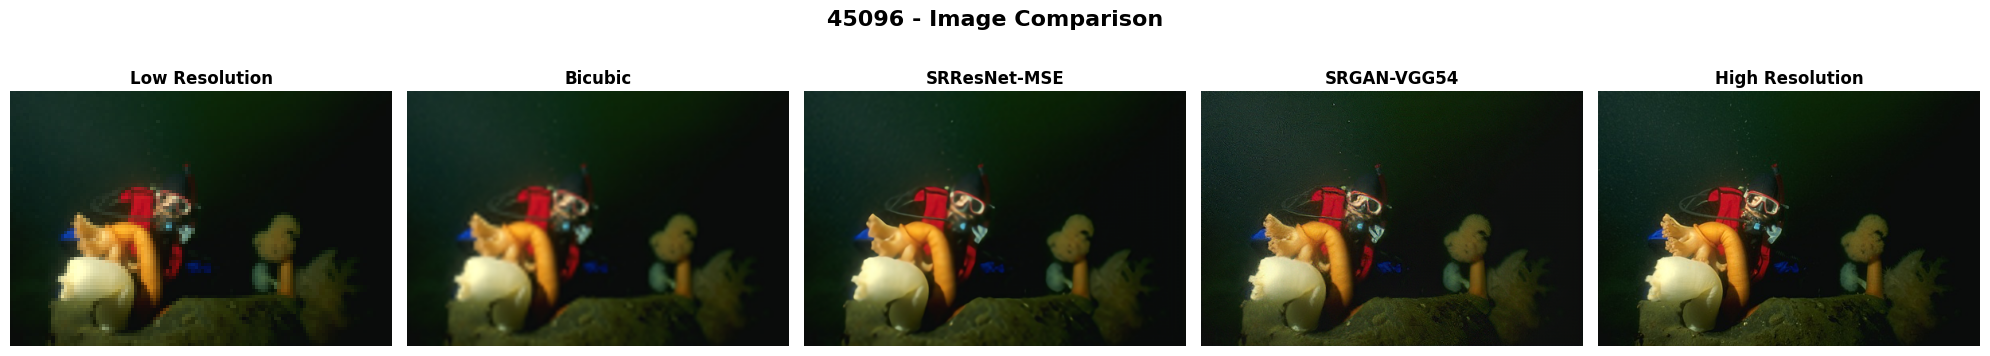

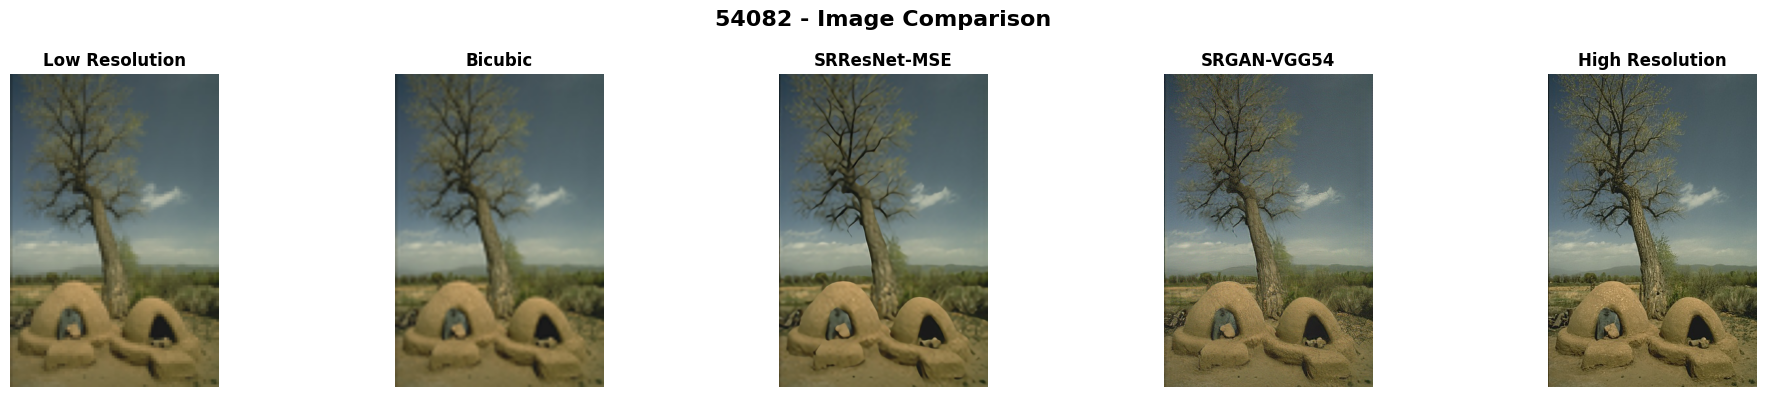

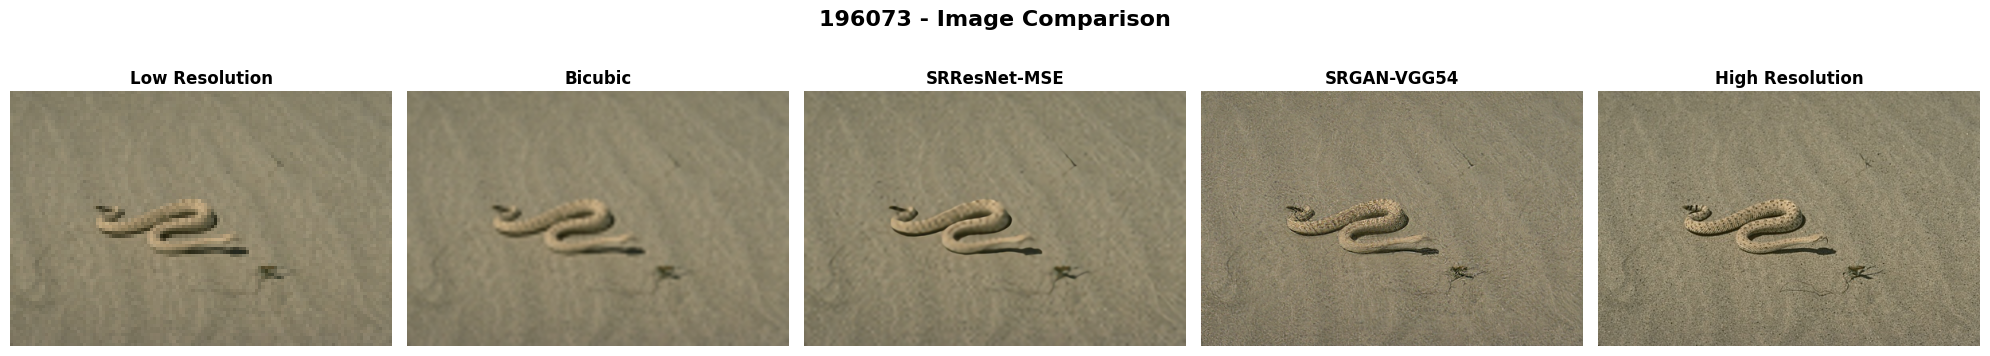

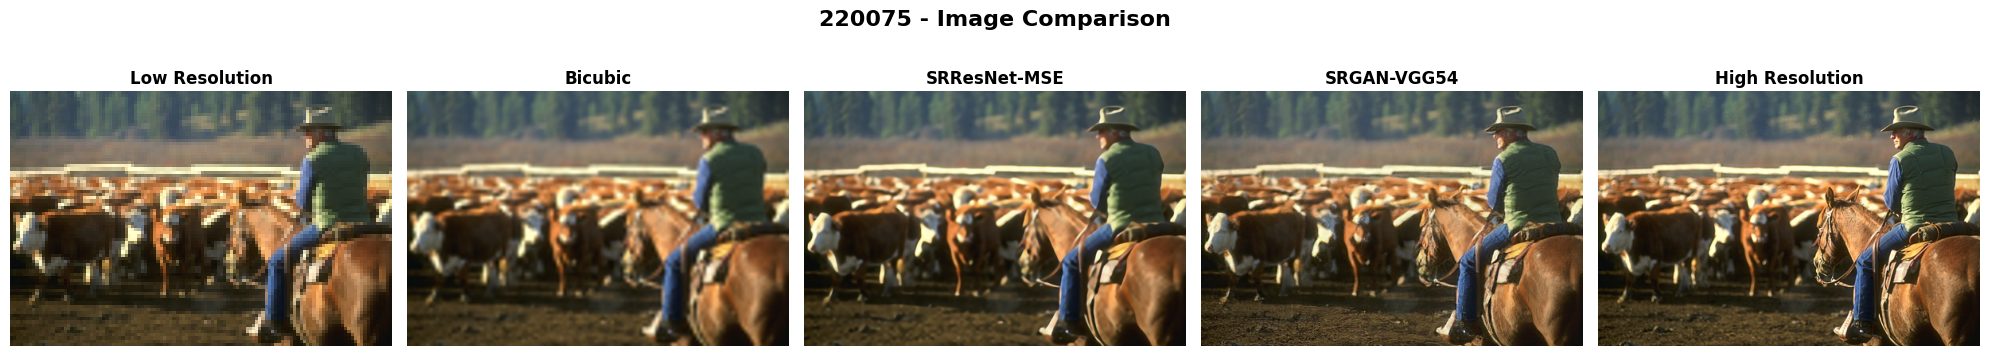

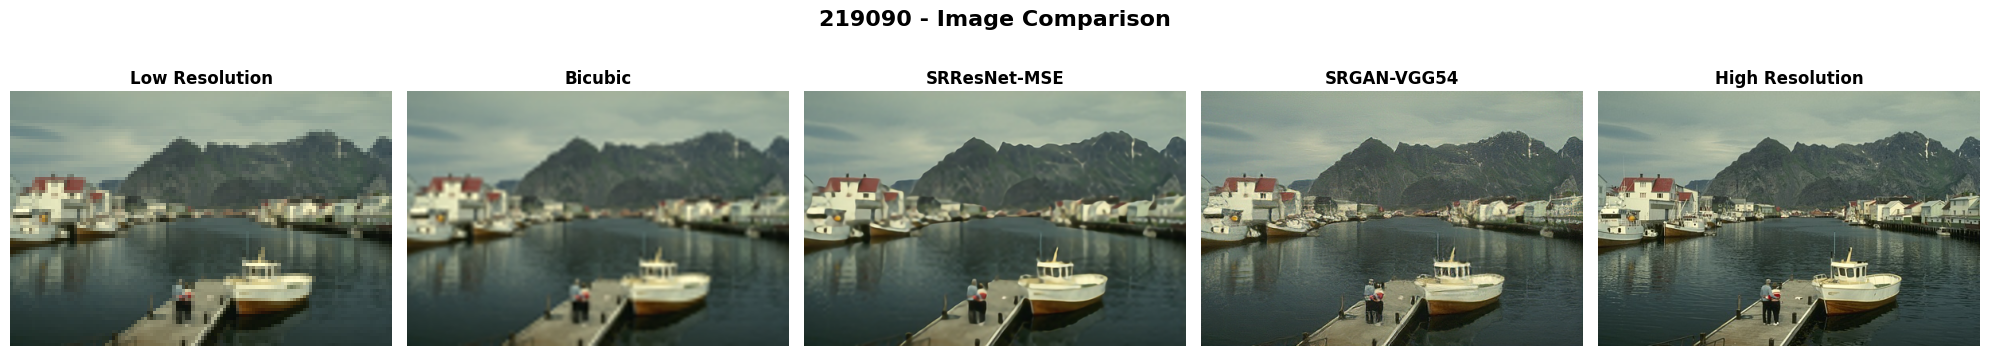

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import defaultdict

# Set up the directory path
image_dir = "../results/Paper-Output/BSD100"

# Define specific base names to process
target_base_names = ['45096', '54082', '196073', '220075', '219090']

# Get all image files and group by base name
image_groups = defaultdict(list)

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        # Extract base name (e.g., 'baby' from 'baby_bicubic.png')
        base_name = filename.split('_')[0]
        # Only include target base names
        if base_name in target_base_names:
            image_groups[base_name].append(filename)

# Define the order of methods (LR first, then HR and enhanced versions)
method_order = ['LR', 'bicubic', 'SRResNet-MSE', 'SRGAN-VGG54', 'HR']
method_labels = {
    'LR': 'Low Resolution',
    'bicubic': 'Bicubic',
    'SRResNet-MSE': 'SRResNet-MSE',
    'SRGAN-VGG54': 'SRGAN-VGG54',
    'HR': 'High Resolution'
}

def load_image(filepath):
    """Load image without resizing"""
    img = Image.open(filepath)
    return np.array(img)

# Create visualization for each image group (only target base names)
for base_name in target_base_names:
    if base_name not in image_groups:
        print(f"Warning: No images found for {base_name}")
        continue
        
    filenames = image_groups[base_name]
    
    # Organize files by method
    method_files = {}
    for filename in filenames:
        for method in method_order:
            if f"_{method}.png" in filename:
                method_files[method] = filename
                break
    
    # Filter to only include methods we have files for
    available_methods = [method for method in method_order if method in method_files]
    
    if len(available_methods) < 2:  # Skip if we don't have enough images
        continue
    
    # Create subplot
    fig, axes = plt.subplots(1, len(available_methods), figsize=(4*len(available_methods), 4))
    if len(available_methods) == 1:
        axes = [axes]
    
    # Display images
    for i, method in enumerate(available_methods):
        img_path = os.path.join(image_dir, method_files[method])
        img = load_image(img_path)
        
        axes[i].imshow(img)
        axes[i].set_title(method_labels[method], fontsize=12, fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle(f'{base_name} - Image Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"../results/Paper-Output-Organized/bsd-100-{base_name}_comparison.png", bbox_inches='tight', dpi=300)